In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as T
import matplotlib.pyplot as plt
import numpy as np

from utils import *
from augmentation import *
from dataloader import LoadCocoDataset

device = torch.device(f"cuda:0" if torch.cuda.is_available() else "cpu")
print(f"pytorch version: {torch.__version__}")
print(f"Running on {device}.")

pytorch version: 1.11.0
Running on cpu.


### Loading data

loading annotations into memory...
Done (t=0.11s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!

The training, validation, and test dataset contain 85578, 4182, and 4182 images respectively.
Target: classify 1394 different classes.


/Users/marco/mushroom/dataloader.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(target, dtype=torch.float32)


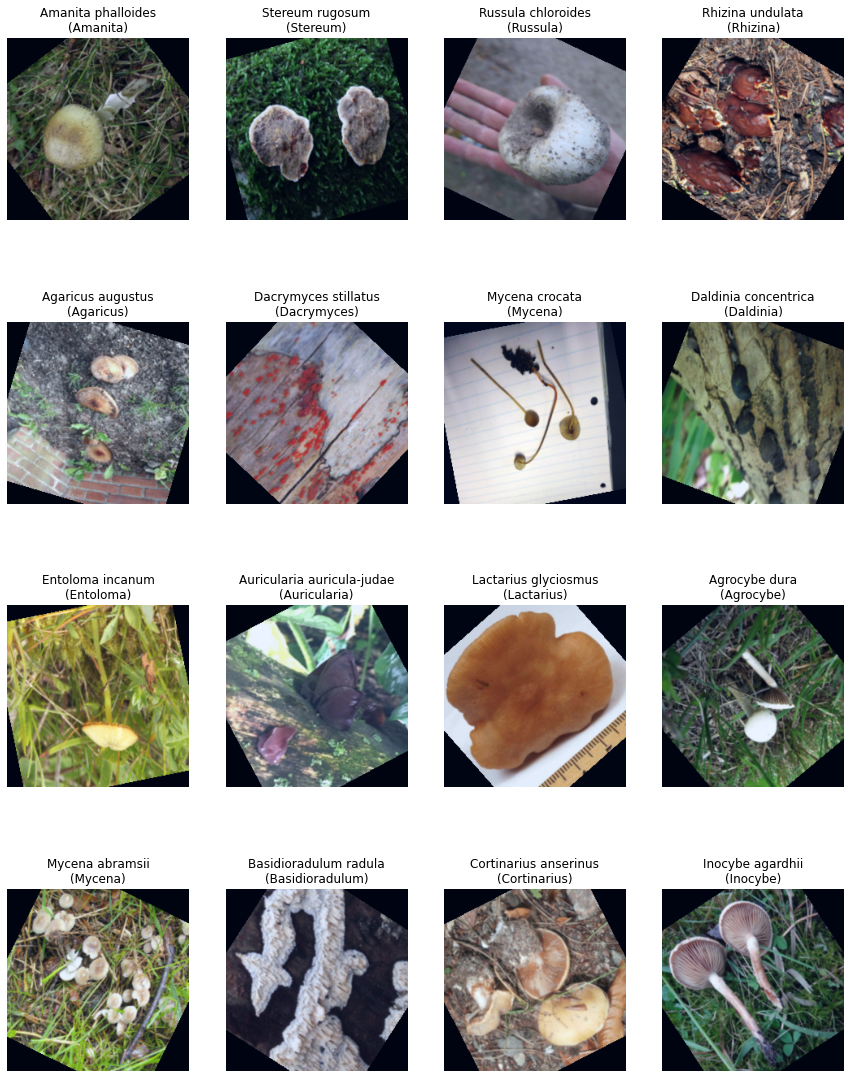

In [2]:
train_path = "./annotations/train.json"
val_path = "./annotations/val.json"
test_path = "./annotations/test.json"
image_shape = (224, 224)

# loading data
train_transforms =  T.Compose([
        T.Resize(image_shape),
        T.RandomHorizontalFlip(0.5),
        T.RandomVerticalFlip(p=0.5),
        RandomAdjustGamma(0.2, p=0.5),
        RandomRotation(60, p=50),
        T.ToTensor(),
        T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])

val_transforms =  T.Compose([
        T.Resize(image_shape),
        T.ToTensor(),
        T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])

train_ds = LoadCocoDataset(train_path, train_transforms)
val_ds = LoadCocoDataset(val_path, val_transforms)
test_ds = LoadCocoDataset(val_path, val_transforms)
num_classes = train_ds.num_classes

print(f"\nThe training, validation, and test dataset contain {len(train_ds)}, {len(val_ds)}, and {len(test_ds)} images respectively.")
print(f"Target: classify {train_ds.num_classes} different classes.")

random_indexes = np.random.randint(len(train_ds), size=16)
plt.figure(figsize=(15,20))
for i in range(len(random_indexes)):
    idx = random_indexes[i]
    x, y = train_ds[idx]
    cat, supercat = train_ds.get_category_info(idx)
    plt.subplot(4, 4, 1+i)
    plot_fig(x, f"{cat}\n({supercat})")
    plt.axis('off')
plt.show()

### Dataset histograms

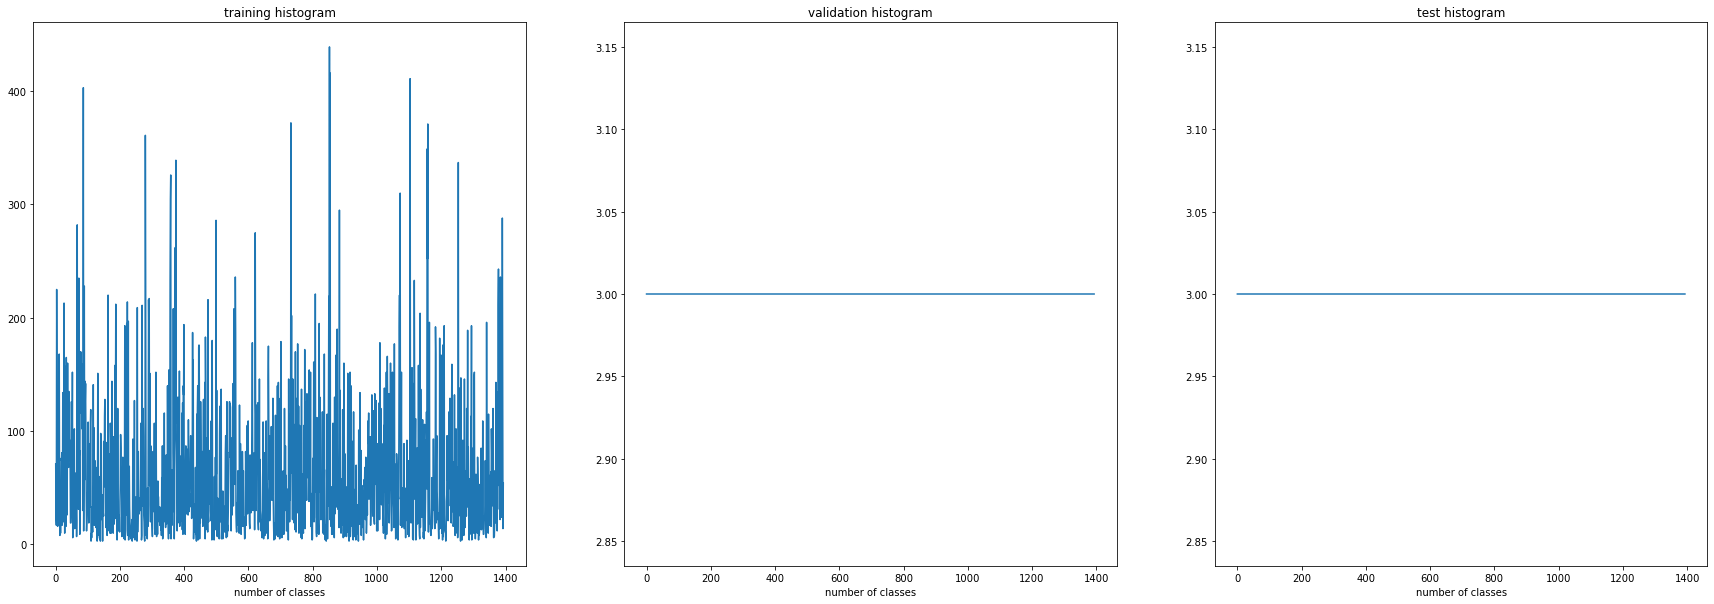

In [12]:
train_hist = get_hist(train_ds, num_classes)
val_hist = get_hist(val_ds, num_classes)
test_hist = get_hist(test_ds, num_classes)

plt.figure(figsize=(30, 10))
plt.subplot(131)
plt.plot(train_hist)
plt.xlabel("number of classes")
plt.title("training histogram")
plt.subplot(132)
plt.plot(val_hist)
plt.xlabel("number of classes")
plt.title("validation histogram")
plt.subplot(133)
plt.plot(test_hist)
plt.xlabel("number of classes")
plt.title("test histogram")
plt.show()

### Class weights

In [13]:
class_weights = len(train_ds)/(num_classes * train_hist)
class_weights

array([0.86465132, 2.55792683, 3.61119082, ..., 0.40388318, 4.38501742,
       1.13685637])